In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 670.1 kB/s eta 0:00:00


In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import keras_preprocessing

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Keras Preprocessing version:", keras_preprocessing.__version__)


TensorFlow version: 2.15.0
NumPy version: 1.25.2
Keras Preprocessing version: 1.1.2


# Arithmetic

In [ ]:
local_file = 'arithmetic.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "arithmetic/train/"
TEST_DIR = "arithmetic/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 148 images belonging to 16 classes.
Found 32 images belonging to 16 classes.


In [ ]:
num_classes = train_generator.num_classes
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
3/3 [==============================] - 2s 125ms/step - loss: 660.8464 - accuracy: 0.1216 - val_loss: 770.5737 - val_accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 617.7960 - accuracy: 0.4324 - val_loss: 255.0005 - val_accuracy: 0.4375
Epoch 3/10
3/3 [==============================] - 0s 32ms/step - loss: 277.1149 - accuracy: 0.4932 - val_loss: 160.1990 - val_accuracy: 0.5625
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 86.6127 - accuracy: 0.6419 - val_loss: 60.6515 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 42.7151 - accuracy: 0.8581 - val_loss: 28.7677 - val_accuracy: 0.9062
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 12.1914 - accuracy: 0.9459 - val_loss: 6.1065 - val_accuracy: 0.9375
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 12.7363 - accuracy: 0.9189 - val_loss: 9.6917 - val_accuracy: 0.9375
Epoch 8/

In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 62ms/step - loss: 16.6179 - accuracy: 0.9375
test loss, test acc: [16.617904663085938, 0.9375]


1/1 [==============================] - 0s 42ms/step - loss: 16.6179 - accuracy: 0.9375
Test loss, test accuracy: [16.617904663085938, 0.9375]
1/1 [==============================] - 0s 81ms/step


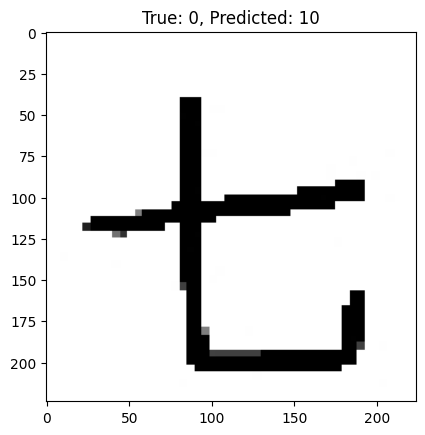

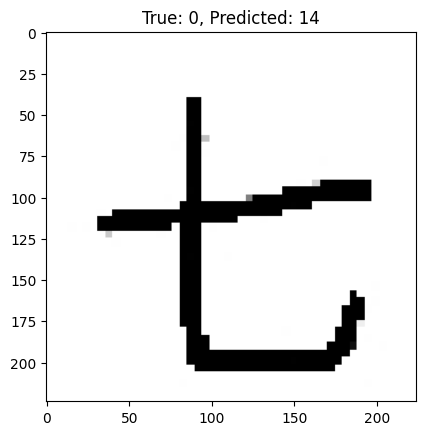

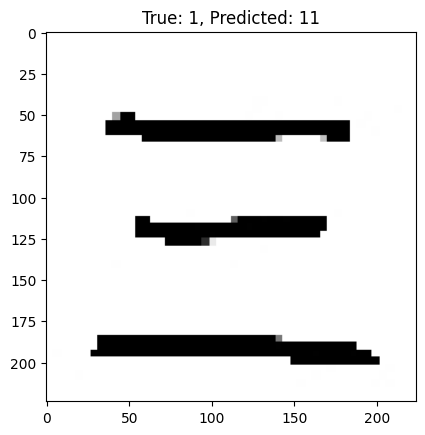

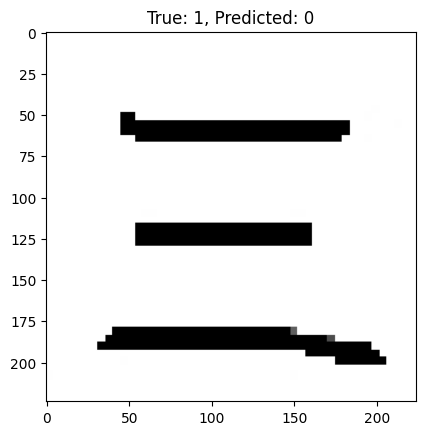

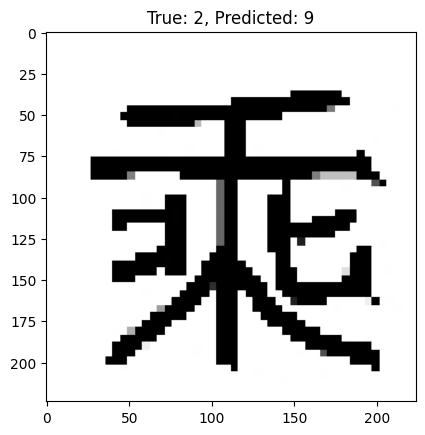

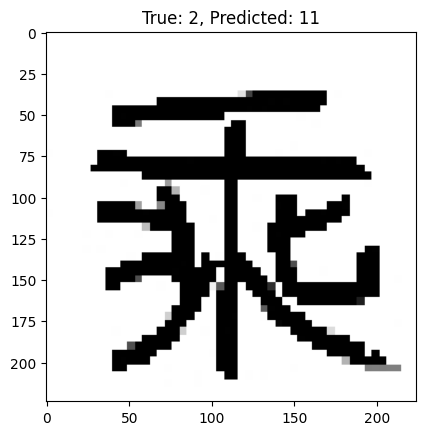

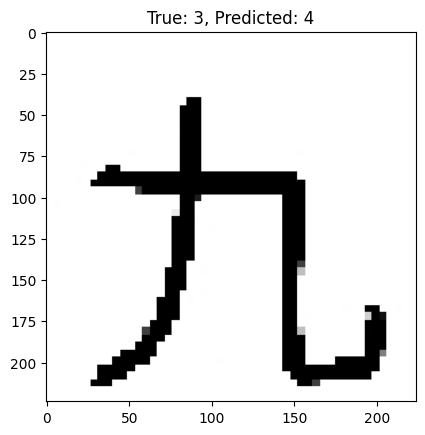

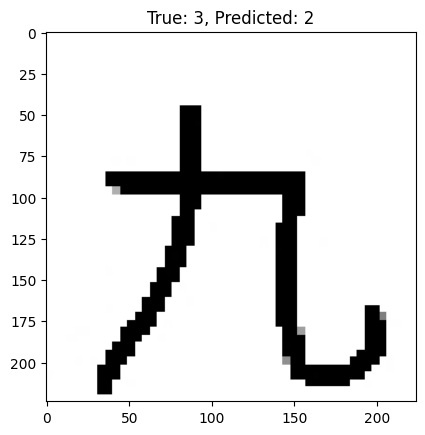

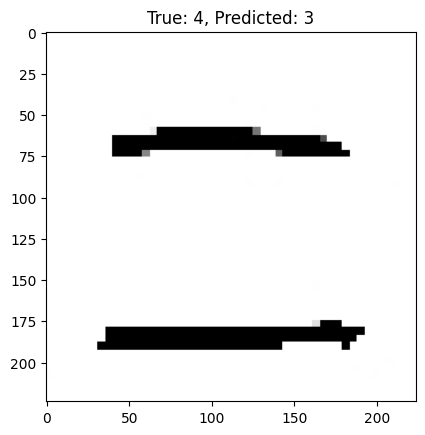

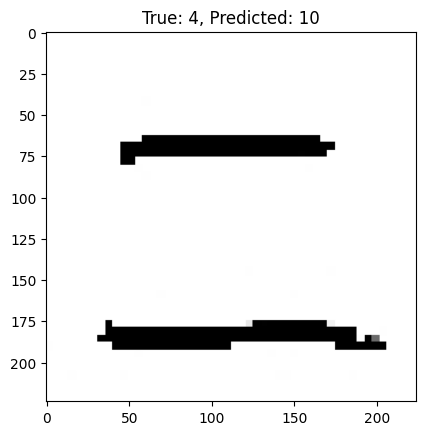

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

# Evaluate the model
results = model.evaluate(test_generator)
print("Test loss, test accuracy:", results)

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Identify wrong predictions
wrong_predictions = np.where(predicted_classes != true_classes)[0]

# Extract wrongly predicted data
wrong_images = [test_generator.filenames[i] for i in wrong_predictions]
wrong_true_labels = [true_classes[i] for i in wrong_predictions]
wrong_predicted_labels = [predicted_classes[i] for i in wrong_predictions]

# Display some of the wrong predictions
for i, idx in enumerate(wrong_predictions[:10]):  # Display the first 10 wrong predictions
    img_path = os.path.join(test_generator.directory, wrong_images[i])
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size based on your model input
    plt.imshow(img)
    plt.title(f"True: {wrong_true_labels[i]}, Predicted: {wrong_predicted_labels[i]}")
    plt.show()


In [ ]:
model.save("arithmetic.h5")

In [ ]:
model = tf.keras.models.load_model('arithmetic.h5')

In [ ]:
model.input_shape

(None, 50, 50, 3)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{0: '七', 1: '三', 2: '乘', 3: '九', 4: '二', 5: '于', 6: '五', 7: '八', 8: '六', 9: '加', 10: '十', 11: '四', 12: '減', 13: '等', 14: '除', 15: '零'}


In [ ]:
import cv2


img_path = "canvas_3_12 (10).jpg" # B

img = image.load_img(img_path, target_size=(50, 50))


img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)



predictions = model.predict(img_array)

print("Predictions:", predictions)

predicted_class_index = np.argmax(predictions, axis=1)[0]

print("Predicted_class_index: ",predicted_class_index)

predicted_class_label = index_to_class[predicted_class_index]

print(f'Predicted_class_label: {predicted_class_label}')

1/1 [==============================] - 0s 60ms/step
Predictions: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted_class_index:  2
Predicted_class_label: 乘


# bodyparts

In [ ]:
local_file = 'body_parts.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "body_parts/train/"
TEST_DIR = "body_parts/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 180 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


In [ ]:
num_classes = train_generator.num_classes
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.fit(train_generator, epochs=10, validation_data=train_generator)

Epoch 1/10
3/3 [==============================] - 3s 396ms/step - loss: 432.6722 - accuracy: 0.2778 - val_loss: 627.0590 - val_accuracy: 0.6500
Epoch 2/10
3/3 [==============================] - 0s 156ms/step - loss: 562.3770 - accuracy: 0.6056 - val_loss: 151.1480 - val_accuracy: 0.7333
Epoch 3/10
3/3 [==============================] - 0s 171ms/step - loss: 98.5443 - accuracy: 0.8222 - val_loss: 154.2160 - val_accuracy: 0.6333
Epoch 4/10
3/3 [==============================] - 0s 175ms/step - loss: 67.0068 - accuracy: 0.8611 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 162ms/step - loss: 2.3336 - accuracy: 0.9722 - val_loss: 10.8030 - val_accuracy: 0.9333
Epoch 6/10
3/3 [==============================] - 0s 172ms/step - loss: 5.3908 - accuracy: 0.9611 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 155ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy

In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000
test loss, test acc: [0.0, 1.0]


In [ ]:
model.save("bodyparts.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{0: '口', 1: '心', 2: '手', 3: '牙', 4: '皮', 5: '眼', 6: '耳', 7: '腳', 8: '血', 9: '身', 10: '面', 11: '頭', 12: '骨', 13: '髮', 14: '鼻'}


# conversational

In [ ]:
local_file = 'Conversational.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "Conversational/train/"
TEST_DIR = "Conversational/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 241 images belonging to 20 classes.
Found 60 images belonging to 20 classes.


In [ ]:
num_classes = train_generator.num_classes
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(64, (3,3)),
  # tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
4/4 [==============================] - 1s 114ms/step - loss: 753.2778 - accuracy: 0.0871 - val_loss: 431.7749 - val_accuracy: 0.3500
Epoch 2/10
4/4 [==============================] - 0s 35ms/step - loss: 238.9973 - accuracy: 0.5394 - val_loss: 332.7528 - val_accuracy: 0.2667
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 126.5810 - accuracy: 0.6266 - val_loss: 40.8301 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 0s 32ms/step - loss: 52.0256 - accuracy: 0.9170 - val_loss: 53.7969 - val_accuracy: 0.9500
Epoch 5/10
4/4 [==============================] - 0s 36ms/step - loss: 42.7278 - accuracy: 0.9502 - val_loss: 29.6664 - val_accuracy: 0.9500
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 9.5203 - accuracy: 0.9668 - val_loss: 1.8814e-06 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 32ms/step - loss: 1.3578 - accuracy: 0.9834 - val_loss: 0.0382 - val_accuracy: 0.9833
Epoch 8

In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 49ms/step - loss: 2.5829e-08 - accuracy: 1.0000
test loss, test acc: [2.5828658323234777e-08, 1.0]


In [ ]:
model.save("conversational.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{0: '不', 1: '也', 2: '他', 3: '住', 4: '你', 5: '們', 6: '做', 7: '叫', 8: '呢', 9: '嗎', 10: '她', 11: '好', 12: '學', 13: '它', 14: '很', 15: '您', 16: '我', 17: '是', 18: '這', 19: '那'}


# locations

In [ ]:
local_file = 'location.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "location/train/"
TEST_DIR = "location/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 264 images belonging to 22 classes.
Found 66 images belonging to 22 classes.


In [ ]:
num_classes = train_generator.num_classes
model=tf.keras.models.Sequential([
# YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(64, (3,3)),
  # tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3872)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
5/5 [==============================] - 2s 143ms/step - loss: 390.3249 - accuracy: 0.1174 - val_loss: 280.3928 - val_accuracy: 0.5152
Epoch 2/10
5/5 [==============================] - 1s 116ms/step - loss: 129.1106 - accuracy: 0.6439 - val_loss: 7.6675 - val_accuracy: 0.8485
Epoch 3/10
5/5 [==============================] - 1s 93ms/step - loss: 19.2980 - accuracy: 0.8371 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 1s 120ms/step - loss: 1.1816 - accuracy: 0.9811 - val_loss: 0.8393 - val_accuracy: 0.9697
Epoch 5/10
5/5 [==============================] - 1s 89ms/step - loss: 1.5829 - accuracy: 0.9735 - val_loss: 3.6124e-09 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 1s 97ms/step - loss: 0.6526 - accuracy: 0.9962 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 116ms/step - loss: 3.2650 - accuracy: 0.9697 - val_loss: 6.5444e-05 - val_accuracy: 1.0000


In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000
test loss, test acc: [0.0, 1.0]


In [ ]:
model.save("location.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{0: '上', 1: '下', 2: '中', 3: '內', 4: '前', 5: '北', 6: '南', 7: '右', 8: '國', 9: '外', 10: '左', 11: '市', 12: '店', 13: '後', 14: '房', 15: '東', 16: '田', 17: '街', 18: '西', 19: '里', 20: '門', 21: '間'}


# nature

In [ ]:
local_file = 'nature.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "nature/train/"
TEST_DIR = "nature/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 182 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


In [ ]:
num_classes = train_generator.num_classes
model=tf.keras.models.Sequential([
# YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(64, (3,3)),
  # tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
3/3 [==============================] - 0s 62ms/step - loss: 0.6623 - accuracy: 0.9890 - val_loss: 3.6876 - val_accuracy: 0.9333
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 7.8726e-06 - accuracy: 1.0000 - val_loss: 2.5829 - val_accuracy: 0.9556
Epoch 3/10
3/3 [==============================] - 0s 38ms/step - loss: 3.4349e-06 - accuracy: 1.0000 - val_loss: 1.8072 - val_accuracy: 0.9556
Epoch 4/10
3/3 [==============================] - 0s 37ms/step - loss: 0.0957 - accuracy: 0.9945 - val_loss: 1.1576 - val_accuracy: 0.9778
Epoch 5/10
3/3 [==============================] - 0s 46ms/step - loss: 2.7510e-08 - accuracy: 1.0000 - val_loss: 0.5117 - val_accuracy: 0.9778
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9778
Epoch 7/10
3/3 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5696e-07 - val_accuracy: 1.0000
Epo

In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 44ms/step - loss: 2.3234e-05 - accuracy: 1.0000
test loss, test acc: [2.323366243217606e-05, 1.0]


In [ ]:
model.save("nature.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{0: '北', 1: '南', 2: '土', 3: '地', 4: '天', 5: '山', 6: '日', 7: '月', 8: '木', 9: '東', 10: '水', 11: '火', 12: '西', 13: '雨', 14: '雪'}


# TFLite (mungkin berubah)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('arithmetic.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('arithmetic.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
model = tf.keras.models.load_model('bodyparts.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('bodyparts.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
model = tf.keras.models.load_model('conversational.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('conversational.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
model = tf.keras.models.load_model('location.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('location.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
model = tf.keras.models.load_model('nature.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('nature.tflite', 'wb') as f:
    f.write(tflite_model)


# EXPERIMENTAL


In [ ]:
local_file = 'body_parts.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('')
zip_ref.close()

TRAINING_DIR = "body_parts/train/"
TEST_DIR = "body_parts/test/"
training_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50))
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode='categorical',
    batch_size=64,
    target_size=(50, 50)
)

Found 180 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


In [ ]:
# Predict on the training data
train_predictions = model.predict(train_generator, verbose=1)

# Predict on the testing data
test_predictions = model.predict(test_generator, verbose=1)

# Function to get the maximum probability for each prediction
def get_max_probabilities(predictions):
    return np.max(predictions, axis=1)

# Get the maximum probabilities for training and testing predictions
train_max_probabilities = get_max_probabilities(train_predictions)
test_max_probabilities = get_max_probabilities(test_predictions)

# Print the results
print("Maximum probabilities for each class in the training set:")
print(train_max_probabilities)

print("Maximum probabilities for each class in the testing set:")
print(test_max_probabilities)

2/2 [==============================] - 0s 7ms/step
Maximum probabilities for each class in the training set:
[0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.999999